# Data Science - Laboratorio 1 - Series de tiempo
## Dataset: Montly Car Sales

Sofia Velasquez 22049

José Marchena 22398

### 0. Obtencion de datos

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import importlib


dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
car_sales = pd.read_csv(
    './data/monthly-car-sales.csv', 
    parse_dates=['Month'], 
    index_col='Month',
    date_parser=dateparse
)

division = int(len(car_sales)*0.7)
train_car_sales = car_sales[:division]
test_car_sales = car_sales[division:]

print(car_sales.shape)
print(train_car_sales.shape)
print(test_car_sales.shape)

(108, 1)
(75, 1)
(33, 1)


C:\Users\JM\AppData\Local\Temp\ipykernel_25708\1802074099.py:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  car_sales = pd.read_csv(


In [8]:
%load_ext autoreload
%autoreload 2
import scripts

### 1. Analisis Exploratorio

Description
              Sales
count    108.000000
mean   14595.111111
std     4525.213913
min     5568.000000
25%    11391.250000
50%    14076.000000
75%    17595.750000
max    26099.000000
Time Series


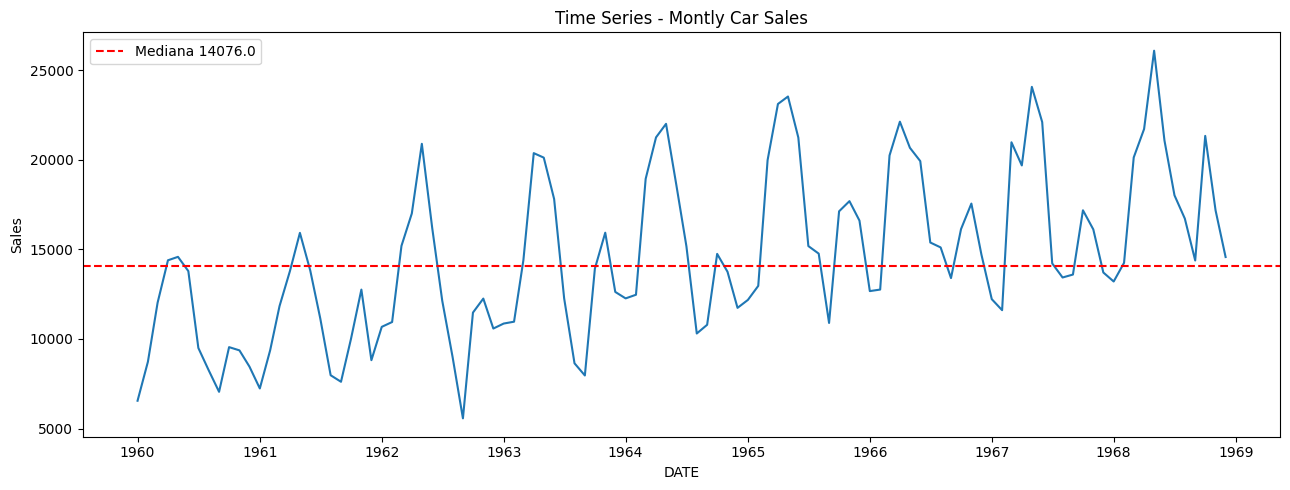

Seasonal Decompose
Resultados del Test de Dickey Fuller
Estadístico de prueba        -1.223813
p-value                       0.663269
# de retardos usados         12.000000
# de observaciones usadas    95.000000
Critical Value (1%)          -3.501137
Critical Value (5%)          -2.892480
Critical Value (10%)         -2.583275
dtype: float64
NO se rechaza Hipotesis Nula => data NO es estacionaria en media
ACF plot


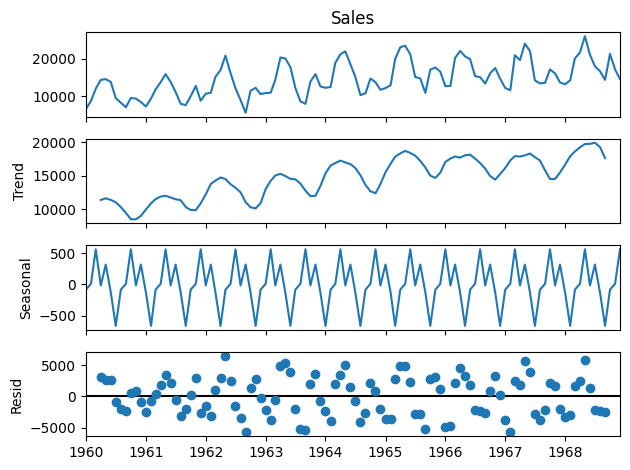

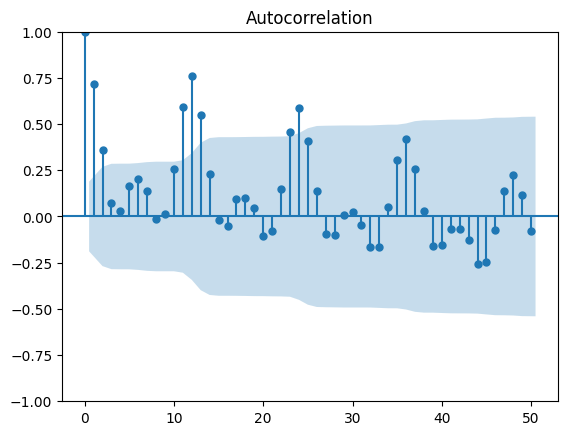

In [9]:
from scripts import exploratory_analysis

value = "Sales"
title = "Montly Car Sales"

exploratory_analysis(
    car_sales,
    value,
    title
)

### 2. Moving Average

Finding Best Periodsss
Best Lag is 10 with weight of 0.6923373620443065


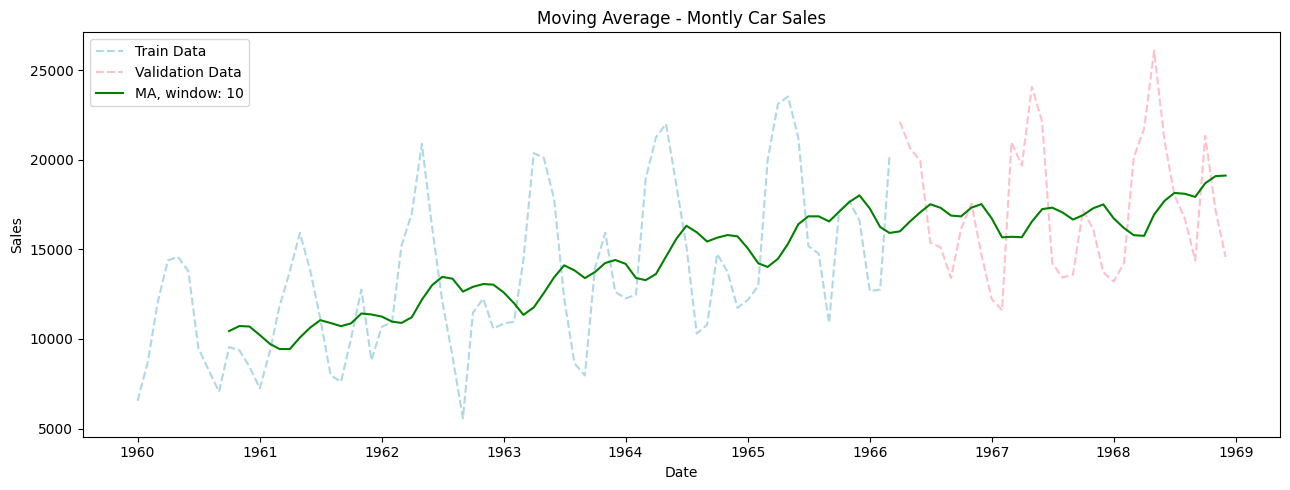

In [16]:

scripts.moving_average(car_sales, test_car_sales, train_car_sales,value, title)

In [18]:
## Error metrics con mejor periodo = 10
y_pred = test_car_sales.rolling(window=10).mean()
scripts.print_error_metrics(y_pred[9:], test_car_sales[9:], "MA - "+title)

Error Metrics - MA - Montly Car Sales
MAE  (Mean Absolute Error):      3658.2250
MSE  (Mean Squared Error):       17540551.2658
RMSE (Root Mean Squared Error):  4188.1441
R²   (R-squared):                -0.1158


#### 3. Simple Exponential Smoothing

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


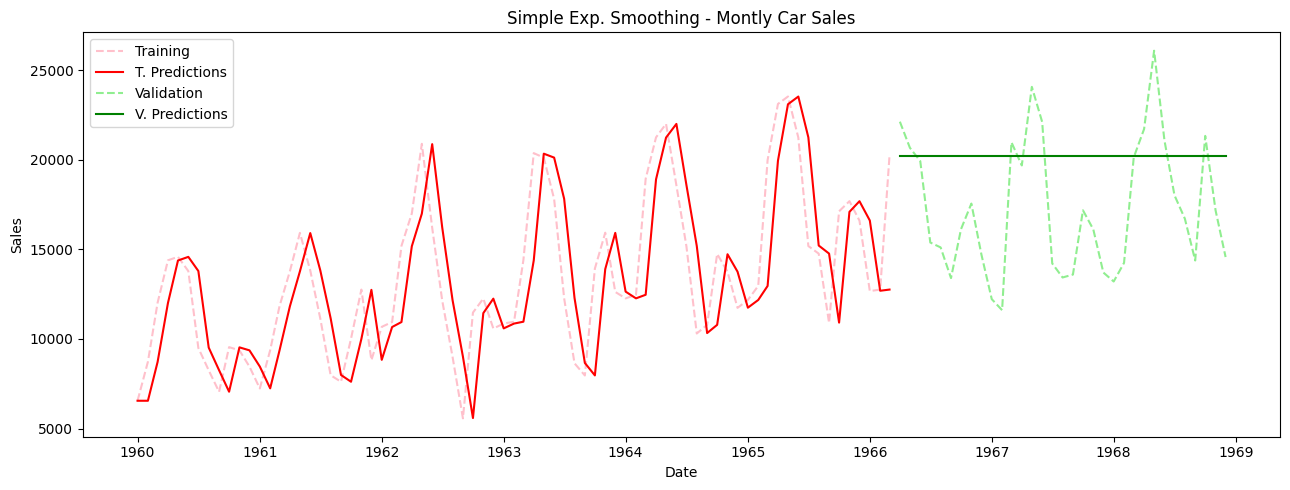

Error Metrics - SES - Montly Car Sales
MAE  (Mean Absolute Error):      3966.0394
MSE  (Mean Squared Error):       21812085.5239
RMSE (Root Mean Squared Error):  4670.3411
R²   (R-squared):                -0.5964


In [19]:
scripts.ses_graph(train_car_sales, test_car_sales, value, title)

#### 4. Holt Winters

##### 4.1 Lineal

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


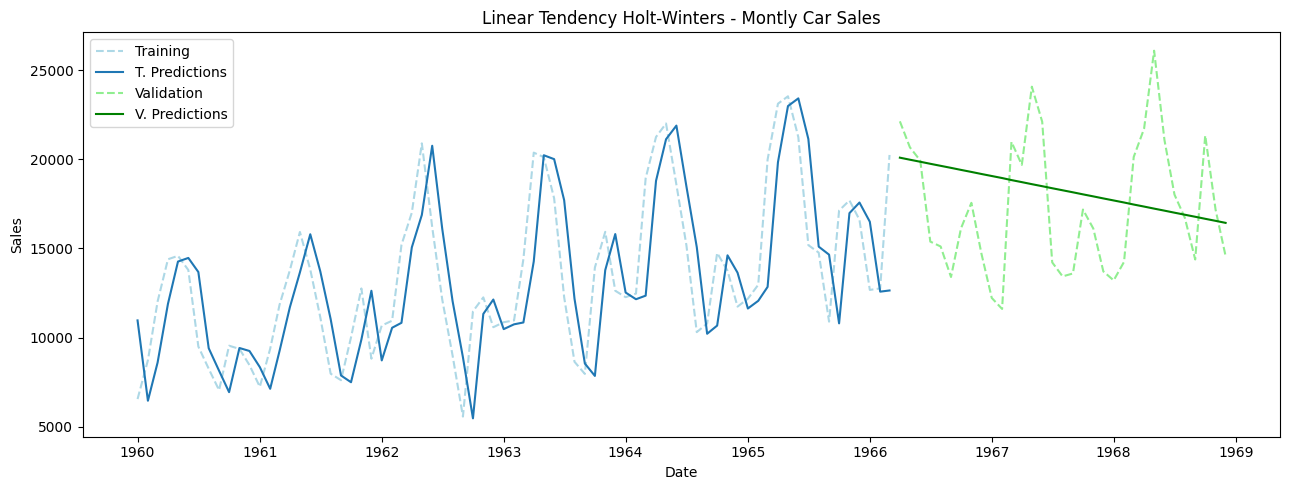

Error Metrics - Lineal HW - Montly Car Sales
MAE  (Mean Absolute Error):      3406.3048
MSE  (Mean Squared Error):       16092344.7742
RMSE (Root Mean Squared Error):  4011.5265
R²   (R-squared):                -0.1778


In [20]:
scripts.lineal_hw(train_car_sales, test_car_sales, value, title)

##### 4.2 Seasonal

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


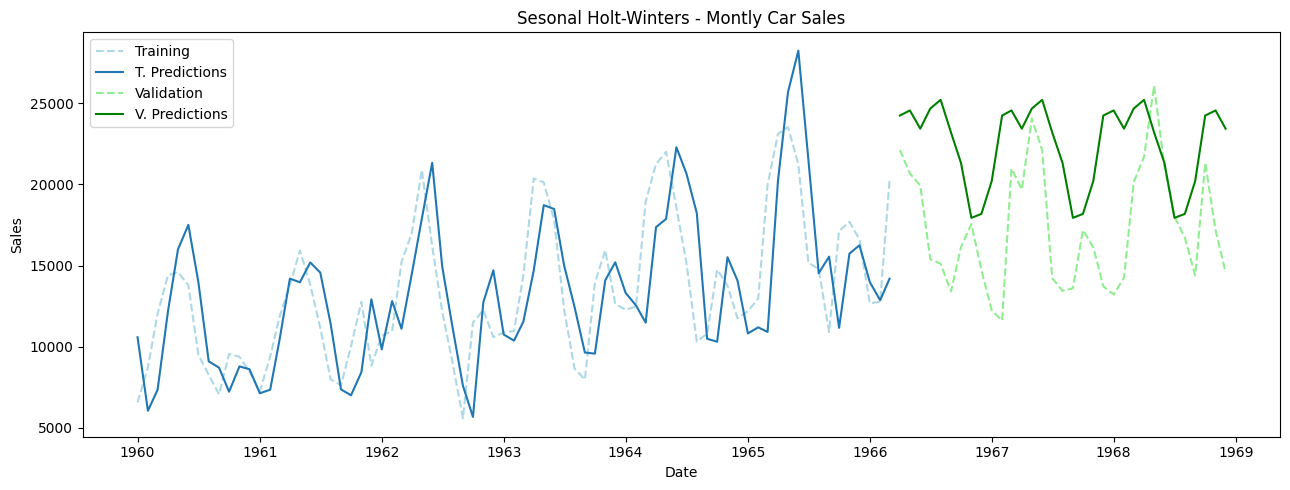

Error Metrics - Seasonal HW - Montly Car Sales
MAE  (Mean Absolute Error):      5291.5892
MSE  (Mean Squared Error):       40624261.6251
RMSE (Root Mean Squared Error):  6373.7165
R²   (R-squared):                -1.9733


In [21]:
scripts.seasonal_hw(train_car_sales, test_car_sales, value, title, 10)

### 5. Modelo SARIMA 

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


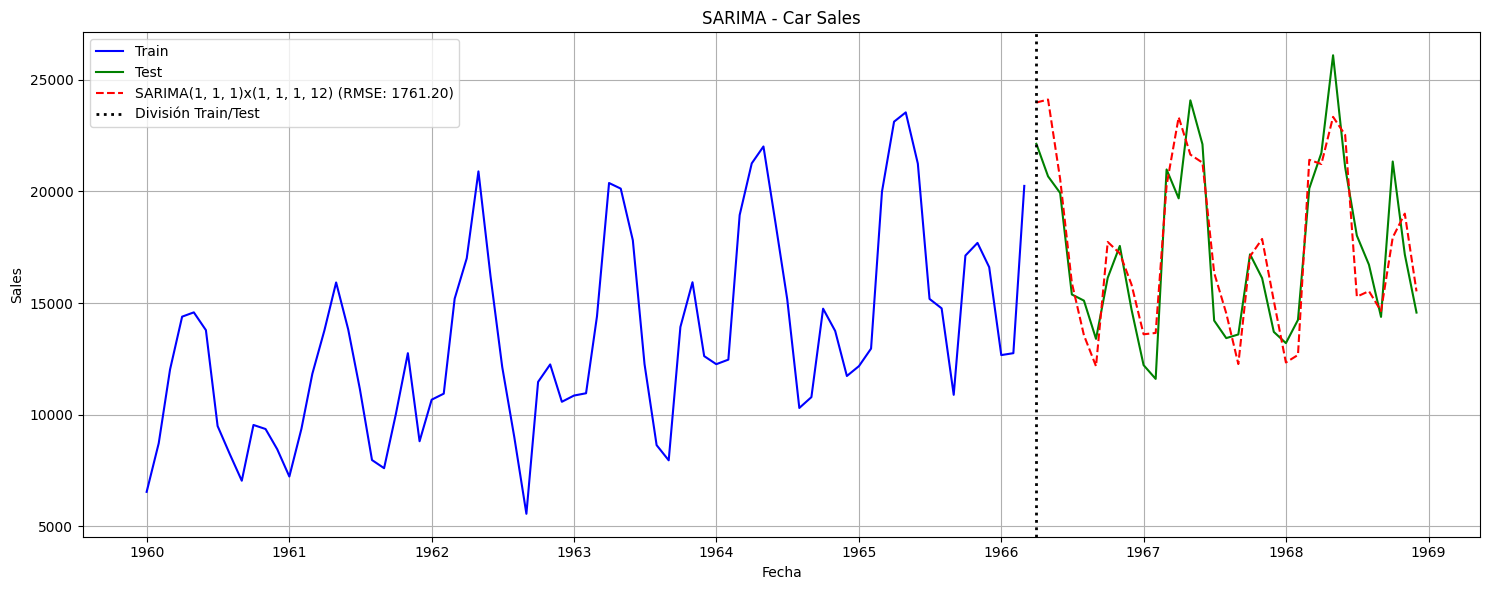

Modelo SARIMA (1, 1, 1)x(1, 1, 1, 12) ajustado.
RMSE: 1761.20, MAE: 1512.13


In [4]:
from scripts import sarima_model

# Aplicar el modelo SARIMA
sarima_model(car_sales.copy(), 'Month', 'Sales', order=(1,1,1), seasonal_order=(1,1,1,12), title="Car Sales")

*Parámetros: (1,1,1)(1,1,1,12)*

- Usé m=12 porque son ventas mensuales y tienen un ciclo anual.


### 6. Modelar serie de tiempo con Prophet

In [32]:
# !pip install plotly
# !pip install prophet

14:06:21 - cmdstanpy - INFO - Chain [1] start processing
14:06:21 - cmdstanpy - INFO - Chain [1] done processing


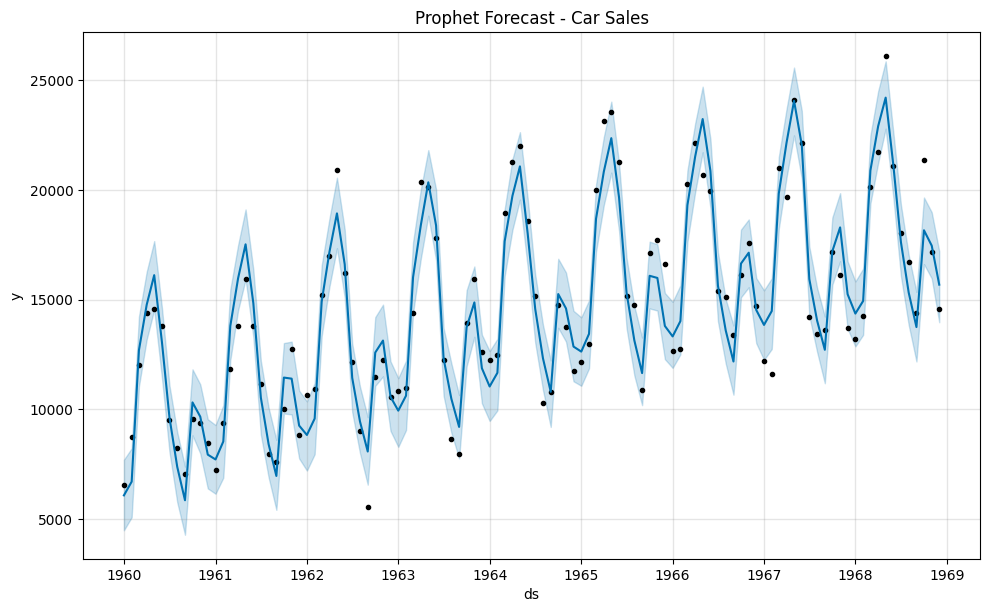

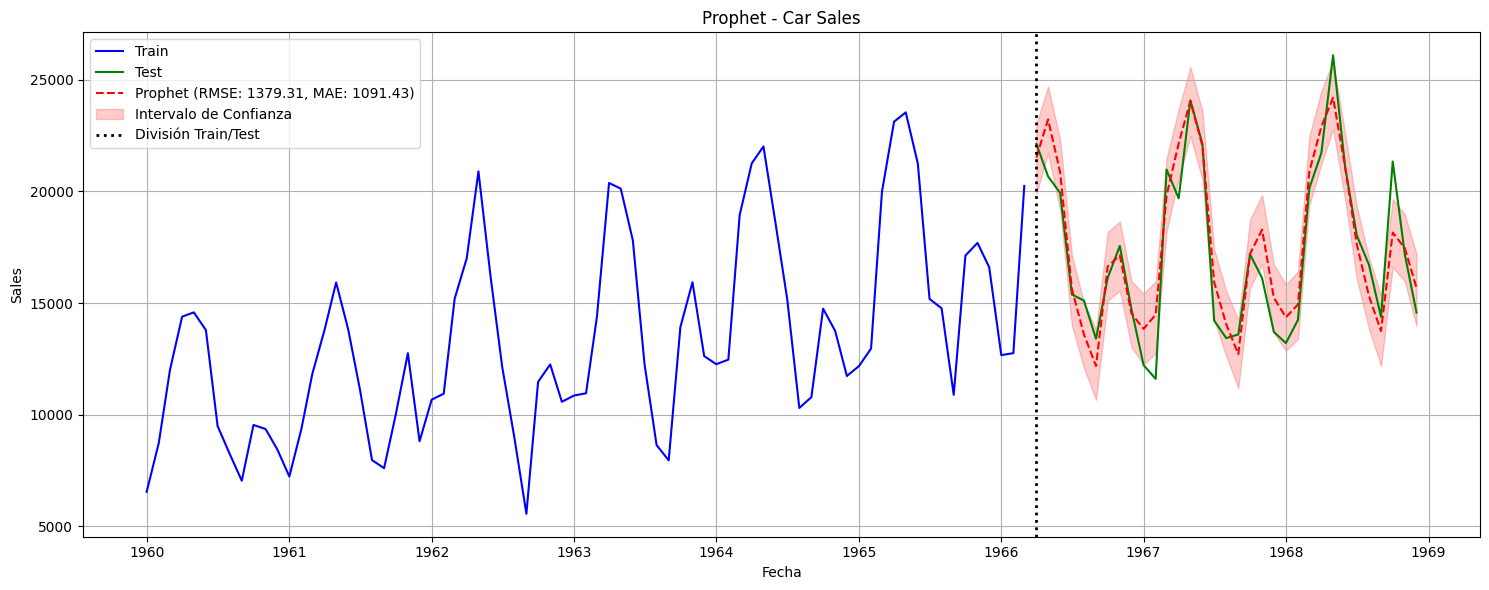

Car Sales - Prophet RMSE: 1379.31, MAE: 1091.43


In [5]:
from scripts import apply_prophet

# Aplicar Prophet
apply_prophet(car_sales.copy(), 'Month', 'Sales', title="Car Sales")

### Comparación de modelos Sarima y Prophet

In [36]:
from scripts import compare_models

# Comparar modelos SARIMA y Prophet
results = []
results.append(compare_models(car_sales, 'Month', 'Sales', (1,1,1), (1,1,1,12), "Car Sales"))

# Convertir resultados en DataFrame
comparison_df = pd.DataFrame(results)
print("\n Comparación de Modelos:\n")
print(comparison_df)

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
17:47:34 - cmdstanpy - INFO - Chain [1] start processing
17:47:34 - cmdstanpy - INFO - Chain [1] done processing



 Comparación de Modelos:

     Dataset  SARIMA_RMSE  SARIMA_MAE  Prophet_RMSE  Prophet_MAE Best_Model
0  Car Sales      2005.79     1587.98       1248.59      1025.96    Prophet
